In [1]:
import pandas as pd
df = pd.read_excel('baseDataSet_1.xlsx')
df.head
data=[]

In [ ]:
# Each Parameter is given weightage - 40% to Verbal Comprehension , 40% to Perceptual Reasoning and 20% to Efficiency
# This break-up is based on papers published regarding the testing of IQ

In [2]:
df1 = df.reset_index()['courseAptitude']
df2 = df.reset_index()['verbalComprehension']
df3 = df.reset_index()['perceptualReasoning']
df4 = df.reset_index()['efficiency(Memory + Speed)']

In [3]:
#normalize function below to put the parameters of the base data set between 0 to 1

In [4]:
def normalize(num, min_num, max_num):
    return (num - min_num) / (max_num - min_num)


In [5]:
#On reading papers we found out that the avergae change in percentage on their performance is 5%, so we have taken this to be the baseline in the start. 
#Depending on the indiivisual grasping power of the topic , this number or percentage will vary and on implementing the algorithm we can keep record of the user's data. 
#This data set can be used to predict the performance of the user for his future learining.  

In [6]:
df_1=[]
df_2=[]
#z = 0.05
z = 0.05
data.append(z)
def cus_range():
    for i in range(0,250):
        x1 = z*df1[i]+ df1[i]
        x2 = df1[i]*(1-z)
        if x1>0 and x2>0:
            df_1[i] = round(x1,2)
            df_2[i] = round(x2,2)    

In [7]:
#the following code normalizes the parameters of the Aptiude test which is stored in the vairbales below. 
#These values will keep changing and help in creating the dataset of performance for the indivisual

In [8]:
df2_norm = []
df3_norm = []
df4_norm = []
for i in range(0,250):
    df2_norm.append(normalize(df2[i], 0, 1))
    df3_norm.append(normalize(df3[i], 0, 1))
    df4_norm.append(normalize(df4[i], 0, 1))


In [9]:
#this creates a standard level for the individual growth namely 5% change depending on the marks of the individual.

In [10]:
for i in range(0,250):
    x1 = z*df1[i]+ df1[i]
    x2 = df1[i]*(1-z)
    if x1>0 and x2>0:
        df_1.append(round(x1,2))
        df_2.append(round(x2,2))


In [11]:
df_user_iq = int(input())
percentage_user = (df_user_iq / 250)

In [12]:
#depending on the score of the aptitude test we have divvied it into 3 levels - beginner(0-84) , intermediate(85-168) , advanced(168+)


In [13]:
if( 0<df_user_iq and df_user_iq<=84 ):
    print("Beginner Course")
elif(85 < df_user_iq and df_user_iq <= 168):
    print("Intermediate Course")
elif(168 < df_user_iq):
    print("Advanced Course")

Beginner Course


In [14]:
# the follwoing stores the questions (in the order of the paraments of IQ) that were answered correctly by the user in his first course assesment.
# We have taken the test to have 10 questions.

In [15]:
df2_ass1 = int(input())
df3_ass1 = int(input())
df4_ass1 = int(input())
ch =[]
level = 1

In [ ]:
# THe follwing code scales up the values of the assesment to measure the IQ score changes.

In [17]:
val1_df2_ass1 = (df2_ass1/10)*100
val1_df3_ass1 = (df3_ass1/10)*100
val1_df4_ass1 = (df4_ass1/10)*50
result_ass1 = (val1_df2_ass1*0.4) + (val1_df3_ass1*0.4) + (val1_df4_ass1*0.2)
percentage_ass1 = (result_ass1/250)
percentage_change = (percentage_ass1-percentage_user)*100

In [18]:
percentage_change

-2.0000000000000018

In [19]:
result_ass1

51.0

In [ ]:
# the following code is required to calculate the percentage change in learning growth.
# the results are stored in the variable data and this dataset will be used to predict the change in learning for the individual.

In [21]:
original = 0
def change(current):
    if current > df_1[df_user_iq]:
        original = df_1[df_user_iq]
    elif current < df_2[df_user_iq]:
        original = df_2[df_user_iq]
    elif df_2[df_user_iq] <current and current < df_1[df_user_iq]:
        original = df_user_iq
    delta = ((current - original)/current)
    return delta

In [61]:
original

0

In [22]:
delta=change(result_ass1)
ch.append(delta)
final = 0
for i in range (0,level):
    final = ch[i]+final
final = final/level
z = z+final


In [23]:
data.append(z)

In [24]:
df_11=[]
df_12=[]
for i in range(0,250):
    x1 = z*df1[i]+ df1[i]
    x2 = df1[i]*(1-z)
    if x1>0 and x2>0:
        df_11.append(round(x1,2))
        df_12.append(round(x2,2))

In [25]:
data

[0.05, -0.011764705882352913]

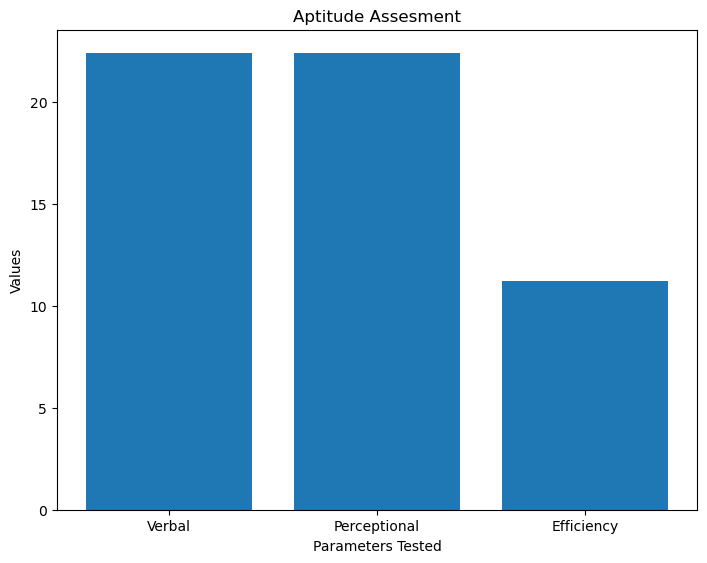

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data for the bar graph
x = np.array(['Verbal', 'Perceptional', 'Efficiency'])
y = np.array([df2[df_user_iq], df3[df_user_iq], df4[df_user_iq]])

# Create a figure with a larger size
plt.figure(figsize=(8, 6))

# Create a bar graph
plt.bar(x, y)

# Adjust the spacing between the bars
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Add labels and title to the graph
plt.xlabel('Parameters Tested')
plt.ylabel('Values')
plt.title('Aptitude Assesment')

# Show the graph
plt.show()


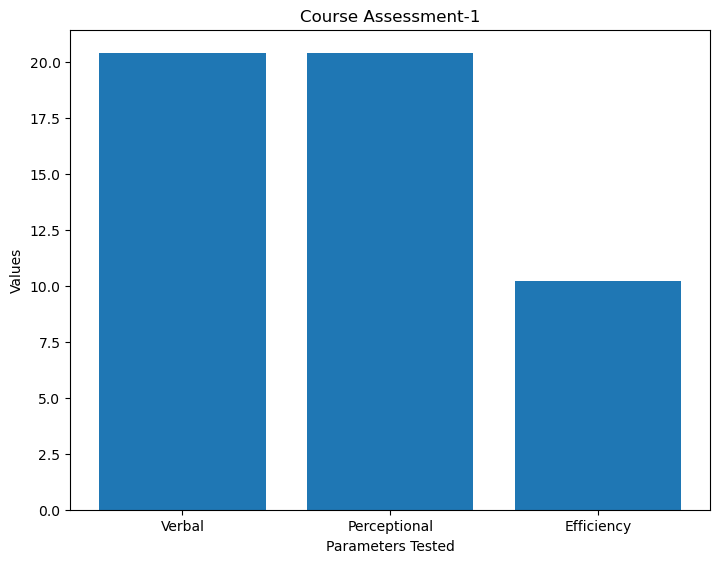

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data for the bar graph
x = np.array(['Verbal', 'Perceptional', 'Efficiency'])
y = np.array([df2[result_ass1], df3[result_ass1], df4[result_ass1]])

# Create a figure with a larger size
plt.figure(figsize=(8, 6))

# Create a bar graph
plt.bar(x, y)

# Adjust the spacing between the bars
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Add labels and title to the graph
plt.xlabel('Parameters Tested')
plt.ylabel('Values')
plt.title('Course Assessment-1')

# Show the graph
plt.show()
